In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


C:\Users\Aditya Dwaraki Rao\AppData\Local\Temp\ipykernel_24376\1962979019.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
print(data.head())
print(data.dtypes)


       MONTH  AVERAGE
0  2023-23-1   112.18
1  2023-23-2   112.68
2  2023-23-3   112.68
3  2023-23-4   112.54
4  2023-23-5   112.51
MONTH       object
AVERAGE    float64
dtype: object


In [6]:
data.set_index('MONTH',inplace = True)


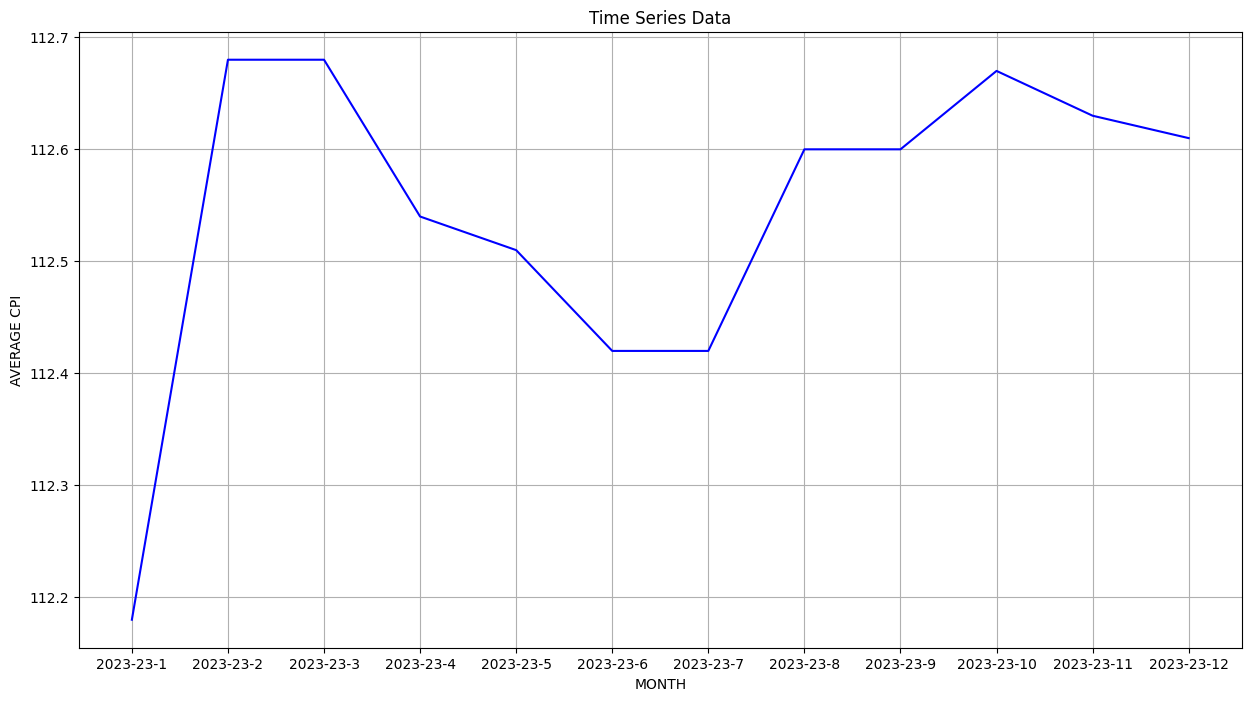

In [7]:
plt.figure(figsize=(15, 8))
plt.plot(data.index, data['AVERAGE'], color='blue')
plt.title('Time Series Data')
plt.xlabel('MONTH')
plt.ylabel('AVERAGE CPI')
plt.grid(True)
plt.show()

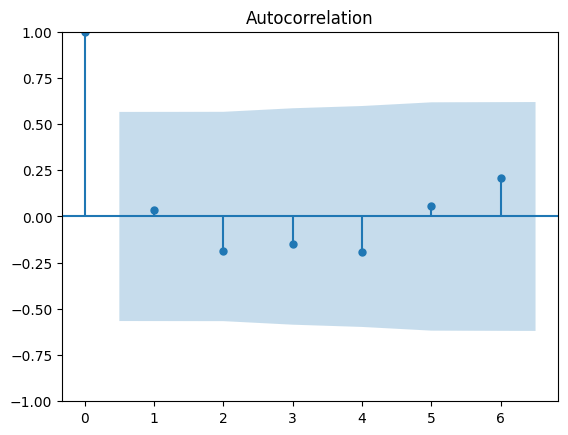

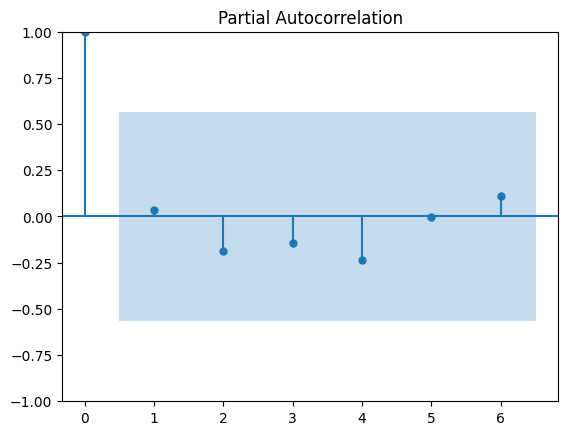

In [10]:
#CHECKING FOR STATIONARITY USING PACF AND ACF PLOTS
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data['AVERAGE'], lags= 6)
plot_pacf(data['AVERAGE'], lags=6)
plt.show()

In [11]:
# Fit ARIMA model
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data['AVERAGE'], order=(2, 1, 3))  # Replace p, d, q with appropriate values
results = model.fit()


c:\Users\Aditya Dwaraki Rao\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
c:\Users\Aditya Dwaraki Rao\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Aditya Dwaraki Rao\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
c:\Users\Aditya Dwaraki Rao\AppData\Local\Programs\Python\Python312\Lib\si

In [26]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                AVERAGE   No. Observations:                   12
Model:                 ARIMA(2, 1, 3)   Log Likelihood                   5.593
Date:                Sat, 13 Apr 2024   AIC                              0.814
Time:                        23:16:29   BIC                              3.202
Sample:                             0   HQIC                            -0.691
                                 - 12                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8115      2.553     -0.318      0.751      -5.816       4.193
ar.L2         -0.3550      2.225     -0.160      0.873      -4.716       4.006
ma.L1          0.7654     24.235      0.032      0.9

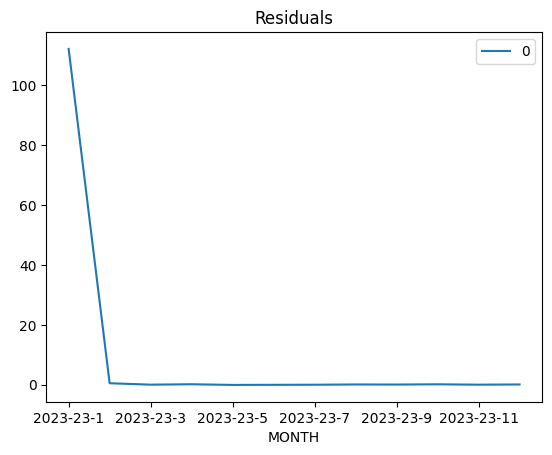

In [12]:
residuals = pd.DataFrame(results.resid)
residuals.plot()
plt.title('Residuals')
plt.show()


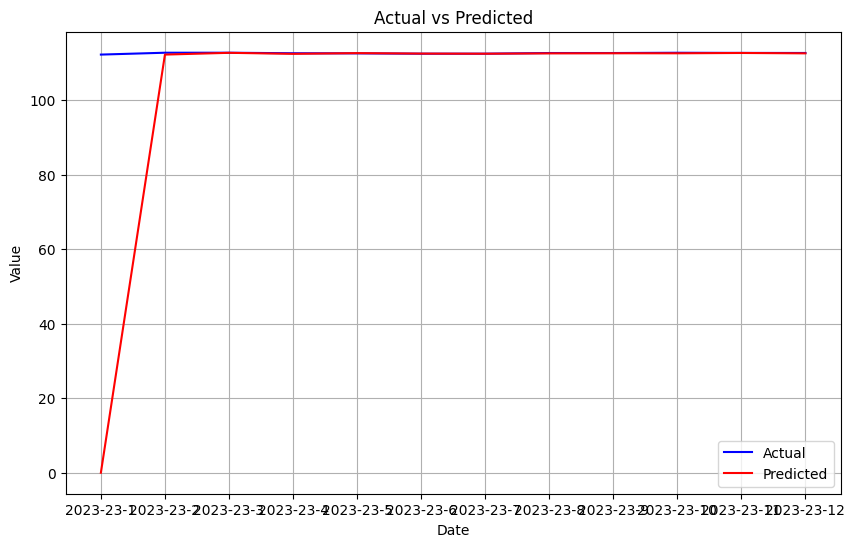

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['AVERAGE'], color='blue', label='Actual')
plt.plot(data.index, results.fittedvalues, color='red', label='Predicted')
plt.title('Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


In [16]:
# Forecast future values
forecast_steps = 6  # Specify the number of steps to forecast
forecast = results.forecast(steps=forecast_steps)

# Print forecasted values
print('Forecasted Values:')
print(forecast)

Forecasted Values:
12    112.591845
13    112.536714
14    112.510038
15    112.551255
16    112.527277
17    112.532104
Name: predicted_mean, dtype: float64


c:\Users\Aditya Dwaraki Rao\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
